# Exercise 4.9 IC Data Visualization Part-2

#This script contains following:

#1 Import Libraries and Dataset;

#2 Creating a Bar Chart;

#3 Creating a Histogram;

#4 Creating Scatter Plot;

#5 Creating random list to test sample data using np.random.rand() <= 0.7;

#6 Visualizing profile distributions;

#7 Descriptive statistics on customer profiles;

#8 Visualizing regional profile differences;

#9 Exporting final Dataset in pickle format.


# 01 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 Importing Datasets

In [2]:
# Defining path
path=r'C:\Users\User01\16.05.2023 Instacart Basket Analysis'

In [3]:
# Importing mergerd orders_products_aggregated and customer data file
df_combined = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','customer_merged.pkl'))

In [4]:
df_combined.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,195,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,195,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,195,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,195,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,195,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


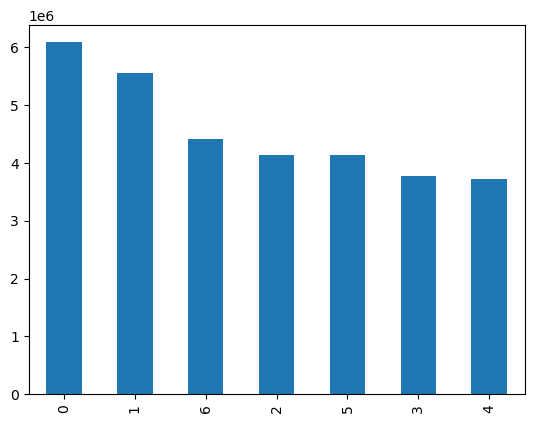

In [5]:
#Creating a bar chart
bar = df_combined['orders_day_of_week'].value_counts().plot.bar()

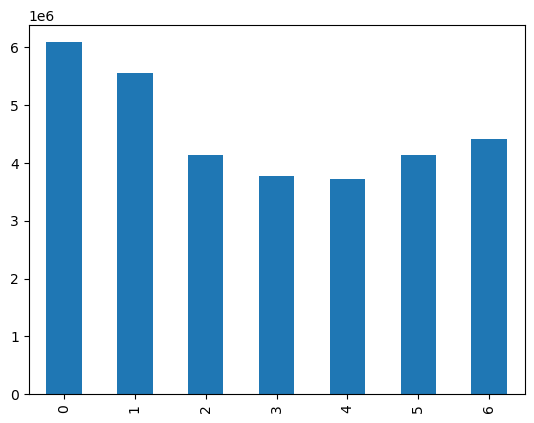

In [6]:
#Sort bar chart
bar = df_combined['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
#Exporting bar chart 
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_combined.png'))

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\User01\\16.05.2023 Instacart Basket Analysis\\04 Analysis\\Visualizations\\bar_combined.png'

In [ ]:
#Creating a histogram
hist = df_combined['prices'].plot.hist(bins = 70)

In [ ]:
#Exporting histogram chart as an image
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices_combined_70.png'))

In [ ]:
#Creating a scatterplot
scatterplot = sns.scatterplot(x = 'prices', y = 'prices',data = df_combined)

In [ ]:
#Exporting scatterplot
scatterplot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatplt_prices_combined.png'))

In [ ]:
#Created a list holding true/false values to test the np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_combined)) <= 0.7

In [ ]:
dev

In [ ]:
np.random.rand(10)

In [ ]:
#Store 70% of the sample in the dataframe big
big = df_combined[dev]

In [ ]:
#Store 30% of the sameple in the datafreame small
small = df_combined[~dev]

In [ ]:
#Check length of dataframe (# of rows)
len(df_combined)

In [ ]:
len(big) + len(small)

In [ ]:
# Creating new dataframe where prices and order_day_of_week columns are from the small subset
df_small = small[['orders_day_of_week','prices']]

In [ ]:
#Creating lineplot
lineplot = sns.lineplot(data = df_small, x = 'orders_day_of_week',y = 'prices')

In [ ]:
#Exporting the lineplot
lineplot.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'line_ords_combined.png' ))

In [ ]:
#Creating a histogram for 'order_hour_of_day'
hist_hour = df_combined['order_hour_of_day'].plot.hist(bins = 24)

# The frequency of orders peaks between 10. am to 5 p.m

# The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [ ]:
#Exporting histogram chart as an image
hist_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_ords_hour_combined_24.png'))

In [ ]:
#Creating a loyalty flag
df_combined['max_order'] = df_combined.groupby(['user_id'])['order_number'].transform(np.max)

In [ ]:
df_combined.head()

In [ ]:
df_combined.loc[df_combined['max_order'] > 40, 'loyalty_flag'] = 'Loyal customer'

In [ ]:
df_combined.loc[(df_combined['max_order'] <= 40) & (df_combined['max_order'] > 10), 'loyalty_flag'] = 'Regular customer'

In [ ]:
df_combined.loc[df_combined['max_order'] <= 10, 'loyalty_flag'] = 'New customer'

In [ ]:
df_combined['loyalty_flag'].value_counts(dropna = False)

In [ ]:
#Creating bar chart for loyalty flag
customers_bar = df_combined['loyalty_flag'].value_counts().plot.bar()

In [ ]:
#Exporting Customers bar chart
customers_bar.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'customer_loyalty_flag_combined.png' ))

In [ ]:
#Creating small dataframe for the columns we need and using the small database we already have
df_small2 = small[['prices', 'order_hour_of_day'] ]

In [ ]:
#Creating lineplot for above df
line_hour = sns.lineplot(data = df_small2, x = 'order_hour_of_day',y = 'prices')

In [ ]:
#Exporting the lineplot
line_hour.figure.savefig(os.path.join(path,'04 Analysis', 'Visualizations', 'expenditures_hour_combined.png' ))

In [ ]:
#Creating small dataframe for the columns we need and using the small database we already have
#Checking to see if there is a connection between age & number of dependents
df_small3 = small[['age', 'number_of_dependants']]

In [ ]:
#Creating lineplot for above df
line_age = sns.lineplot (data = df_small3, x = 'age', y = 'number_of_dependants')

# The line plot does not show a clear trend between age and number of dependents, as the line plot conists of a lot of variation based on the different ages. It can be seen how those 18 yrs old and under have no dependents, which makes sense since they are considered minors.

In [ ]:
#Exporting lineplot
line_age.figure.savefig(os.path.join (path,'04 Analysis', 'Visualizations', 'age_dependants_connection_combined.png'))

In [ ]:
#Creating a scatter plot for age & income
scatterplot_income = sns.scatterplot(data = df_combined, x= 'age', y = 'income')

# The scatterplot above shows the income in relation to customer's ages in 10 year increments. It can be seen that a majority of the customer's make below 200K whereas the income of 60+ yrs is around 600K. This can be supported by a fact that income of any individual increase with increase in its level of experience that is directly proportional to age.

In [ ]:
#Exported scatterplot
scatterplot_income.figure.savefig(os.path.join (path,'04 Analysis', 'Visualizations', 'income_scatterplot_combined.png'))

# Exporting final Dataset in pickle format

In [ ]:
#Exported the customer_merged file
df_combined.to_pickle(os.path.join(path, '02 Data', 'Prepared Data','customer_merged_updated.pkl'))

# All visualizations have been exported under visualization folder.

In [8]:
df_combined.to_csv(os.path.join(path, '02 Data', 'Prepared Data','customer_merged_updated.csv'))
